In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC #SVM
from sklearn.metrics import f1_score,confusion_matrix, roc_curve,classification_report, roc_auc_score,accuracy_score,precision_score,recall_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # 딥러닝 라이브러리
from scipy.stats import skew, kurtosis
import matplotlib as mpl
from collections import deque
from catboost import CatBoostClassifier, Pool, metrics, cv


# sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import *

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

# 데이터 불러오기

In [2]:
card = pd.read_csv('creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
describe_df = card.describe().T
describe_df

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# describe_df['skew'] = skew(card)
skew_list = []
for i in card.columns.values:
    skew_list.append(skew(card[i]))
describe_df['skew'] = skew_list
describe_df
abs_skew = abs(describe_df[['skew']]).sort_values('skew',ascending=False)
abs_skew

,skew
Class,23.997453
Amount,16.977635
V28,11.192032
V8,8.521899
V23,5.875109
V2,4.624841
V17,3.844894
V21,3.592972
V1,3.280650
V7,2.553894


# 데이터 시각화 부분입니다 ------------------------------------------------------------

## corr
- 기존의 데이터와 Undersampling, 그리고 Oversampling 의 corr를 시각화
- 기존 데이터의 corr heatmap 에서는 `V17, V14, V12 ...` 순으로 가장 낮았다.
- Undersampling, Oversampling heatmap에서는 `V17`의 상관계수가 올라갔고 `V14, V12, V10 ..` 순으로 가장 낮았다.  
(그래서 V14만 이상치를 제거한게 아닌가 싶습니다.)

### 시각화 바라는 점
- title,, yticks, xlabel, annot 글자 크기르 조금씩만 키웠으면 좋겠습니다!

NameError: name 'card_samp_u' is not defined

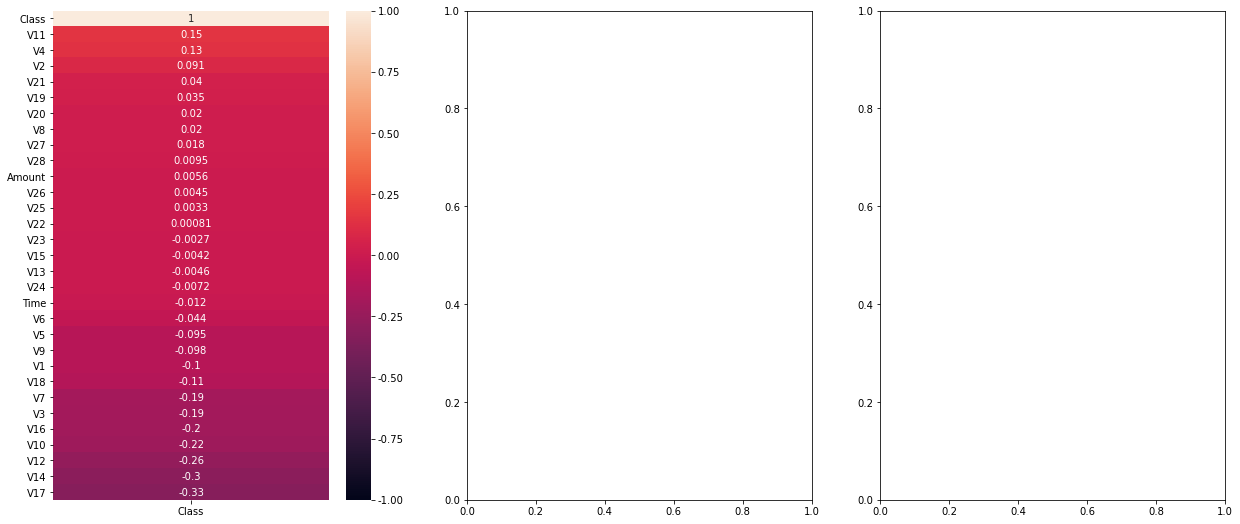

In [7]:

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize = (21,9))
sns.heatmap(card.corr()[['Class']].sort_values('Class',ascending=False), annot=True, vmin=-1, vmax=1, ax=ax1)
sns.heatmap(card_samp_u.corr()[['Class']].sort_values('Class',ascending=False), annot=True, vmin=-1, vmax=1, ax=ax2)
sns.heatmap(card_samp_o.corr()[['Class']].sort_values('Class',ascending=False), annot=True, vmin=-1, vmax=1, ax=ax3)
ax1.set_title('기존', fontdict={'color':'w'})
ax2.set_title('UnderSampling', fontdict={'color':'w'})
ax3.set_title('OverSampling', fontdict={'color':'w'})
plt.show()

## 샘플링별 histplot
- Undersamping, Oversampling 만 비교함
- `Class`와의 상관계수가 0.4이상, -0,4이하인 피처들에 대해 histplot을 그렸습니다.
- 추가적으로 절대값 0.2미만의 상관계수를 가진 피처들도 시각화해보았습니다.
- **각 열에 대한 서브플롯(왼쪽이 Undersamping, 오른쪽이 Oversmapling)입니다.**

### 인사이트
- 양의 상관관계가 높았던(0.4 이상) 피처에서 사기꾼이 아닌 사람의 분포는 첨도가 높고, 분포가 0에 근사했다
- 양의 상관관계가 높았던(0.4 이상) 피처에서 사기꾼인 사람의 분포는 분포가 양수쪽에 쏠려있고, 첨도가 낮고, 왜도는 양수인 (오른쪽꼬리분포) 경향을 보였다.
- 음의 상관관계가 높았던(-0.4이하) 피처에서 사기꾼이 아닌 사람의 분포는 첨도가 높고, 분포가 0에 근사했다
- 음의 상관관계가 높았던(-0.4이하) 피처에서 사기꾼인 사람의 분포는 분포가 음수쪽에 쏠려있고, 첨도가 낮고, 왜도는 음수인 (왼쪽꼬리분포) 경향을 보였다.
- 절대값 0.2 미만의 상관계수 그래프에서는 별로 인사이트가 없었습니다.

### 시각화 바라는 점
- title,, yticks, xlabel, annot 글자 크기르 조금씩만 키웠으면 좋겠습니다


In [8]:
# 0.4이상
upper04_u = list(card_samp_u.corr()[['Class']].query('Class >= 0.4').index)
upper04_o = list(card_samp_o.corr()[['Class']].query('Class >= 0.4').index)
# -0.4이하
under04_u = list(card_samp_u.corr()[['Class']].query('Class <= -0.4').index)
under04_o = list(card_samp_o.corr()[['Class']].query('Class <= -0.4').index)
under04_u.append('Class')
under04_o.append('Class')

# 절대값 0.2 미만
abs02_u = list(card_samp_u.corr()[['Class']].query('abs(Class) <= 0.2').index)
abs02_o = list(card_samp_o.corr()[['Class']].query('abs(Class) <= 0.2').index)

NameError: name 'card_samp_u' is not defined

In [ ]:
def histplot(data, col, ax):
    sns.histplot(x=col, data=data, hue = 'Class', palette='RdBu',kde=True, ax=ax)
    ax.set_title(f'{data}', fontdict={'color':'w'})

In [ ]:
for i,j in zip(upper04_u, upper04_o):
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (18,9))
    histplot(card_samp_u, i, ax1)
    histplot(card_samp_o, i, ax2)
plt.show()

In [ ]:
# -0.4이하 상관관계 undersamplitng, oversampling
for i, j in  zip(under04_u, under04_o):
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (18,9))
    histplot(card_samp_u, i, ax1)
    histplot(card_samp_o, j, ax2)
plt.show()

#### 인사이트
- 양의 상관관계가 높았던(0.4 이상) 피처에서 사기꾼이 아닌 사람의 분포는 첨도가 높고, 분포가 0에 근사했다
- 양의 상관관계가 높았던(0.4 이상) 피처에서 사기꾼인 사람의 분포는 분포가 양수쪽에 쏠려있고, 첨도가 낮고, 왜도는 양수인 (오른쪽꼬리분포) 경향을 보였다.
- 음의 상관관계가 높았던(-0.4이하) 피처에서 사기꾼이 아닌 사람의 분포는 첨도가 높고, 분포가 0에 근사했다
- 음의 상관관계가 높았던(-0.4이하) 피처에서 사기꾼인 사람의 분포는 분포가 음수쪽에 쏠려있고, 첨도가 낮고, 왜도는 음수인 (왼쪽꼬리분포) 경향을 보였다.

In [ ]:
# 상관계수가 작은 값들은 어떨까?
for i,j in zip(abs02_u,abs02_o):
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (18,9))
    histplot(card_samp_u, i, ax1)
    histplot(card_samp_o, i, ax2)
plt.show()

In [ ]:
card_df[under04_u]

## 샘플링별 pairplot
- 이거 오래 걸려서 제가 지금 다시 돌리고있는데 시간 오래걸리면 그냥 어제 카톡에 올린 이미지를 쓰면 될 것 같아요.  
압축해서 사진파일 보내겠습니다.
- 인사이트는 없습니다ㅜㅜ

### 시각화 바라는 점
- 돌리는게 오래 걸리기 때문에 그냥 쓰거나 안쓰는게 좋을 듯합니다!


In [ ]:
def pairplot(data):
    sns.pairplot(data=data, hue='Class')
#     ax.set_title(f'{data}', fontdict={'color':'w'})


pairplot(data=card_df[upper04_u])
pairplot(data=card_df_o[upper04_o])
pairplot(data=card_df[under04_u])
pairplot(data=card_df_o[under04_o])
plt.show()

In [ ]:
# SMOTEENN
# from imblearn.combine import SMOTEENN
# sme = SMOTEENN(random_state=1)
# x_data_new, y_data_new = sme.fit_resample(x_data, y_data)

# 시각화 끝 ---------------------------------------------------------------------------------

# 데이터 전처리
- `Time` 컬럼 삭제
- 왜도(skewness)가 심한 컬럼 보정
- 상관관계가 높은 컬럼의 이상치 제거
- 위의 3가지를 만족하는 Undersampling Data, Oversampling Data를 생성

In [ ]:
def train_test(df):
    df_copy = df.copy()
    df_copy.drop('Time', axis = 1,inplace=True)
    X_data = df_copy.iloc[:, :-1]
    y_data = df_copy.iloc[:, -1]

    x_train,x_test, y_train,y_test = train_test_split(X_data,y_data, test_size=0.3, random_state=1, stratify=y_data)
    return x_train,x_test, y_train,y_test

### 1. Undersampling

In [ ]:
# udersampling
def undersampling(X, y):
    # Undersampling
    X_samp_u, y_samp_u = RandomUnderSampler(random_state=1).fit_resample(X, y)
    
    # 다시 합치기
    df_samp_u = pd.concat([X_samp_u, y_samp_u], axis=1)
    return df_samp_u

### 2. OverSampling

In [ ]:
# SMOTE
def oversampling(X,y):
    # Oversampling: SMOTE
    smote = SMOTE(random_state=0)
    X_samp_o, y_samp_o = smote.fit_resample(X, y)

    # 다시 합치기
    df_samp_o = pd.concat([X_samp_o, y_samp_o], axis=1)
    return df_samp_o

### 3. 이상치 제거

In [ ]:
# 이상치 구하기
def get_outlier(df, feature):
    q1, q3 = np.percentile(df[feature], [25,75])
    iqr = q3-q1
    _min= q1 - (iqr*1.5)
    _max= q3 + (iqr*1.5)
    return np.where((df[feature]<_min)|(df[feature]>_max))

# 이상치 제거
def remove_outlier(df):
    outlier_list = []
    outlier_list.extend(df.corr()[['Class']].query('Class >= 0.4').index)
    outlier_list.extend(df.corr()[['Class']].query('Class <= -0.4').index)
    outlier_list.remove('Class')
    q = deque(outlier_list)
#     print(q)
    while q:
        feature = q.popleft()
#         print(feature)
        outlier_index = get_outlier(df, feature)[0]
#         print(outlier_index)
        df.drop(outlier_index,axis=0,inplace=True)
        df.reset_index(drop=True,inplace=True)
#         display(df)
    return df


### 4. 왜도 보정

**피어슨의 비대칭 계수 보는 방법**  
- 비대칭도 계수가 0이 나오는 경우, 평균과 중앙값(최빈값)이 같으므로, 분포가 치우쳐지지 않음을 알 수 있다.  
- 비대칭도 계수가 양수인 경우, 평균보다 중앙값이 작으므로, 오른쪽 꼬리 분포이다.  
- 비대칭도 계수가 음수인 경우, 평균보다 중앙값이 크므로, 왼쪽 꼬리 분포이다.  
- 비대칭도 계수가 클수록, 한쪽으로 치우친 정도가 크다는 소리다.  
- 비대칭도 계수가 0~1 사이인 경우, 1 표준편차보다 분자(평균과 대푯값의 거리에 3을 곱한 값)가 작다는 의미이므로, 치우친 정도가 작다는 소리다.  
- 이를 이용하여, 서로 다른 분포에 대하여, 치우친 정도를 비교할 수도 있다(표준편차로 나누었으므로, 단위도 사라진다.).  

<br>

출처: https://gooopy.tistory.com/120

<br>

+ 왜도 값이 -2~2 정도의 치우침은 왜도가 크지 않다고 판단한다고 한다.
즉, 절대값 3미만이면 기준에 부합  

<br>

출처: https://m.blog.naver.com/yk60park/222100758577


In [ ]:
def skewCorrection(df):
    df_copy = df.copy()
    df_copy_x = df_copy.iloc[:,:-1]
    df_copy_y = df_copy.iloc[:,-1]
    skew_correct_list = []
    for i in df_copy_x.columns.values:
        skewness = skew(df_copy_x[i])
        if skewness > 2 or skewness < -2:
            skew_correct_list.append(i)
    # Yeo-johnson 으로 이상치 보정
    ct = make_column_transformer((PowerTransformer(method='yeo-johnson'), skew_correct_list), remainder='passthrough')
    card_df_corrected = pd.DataFrame( ct.fit_transform(df_copy_x), columns=df_copy_x.columns.values)
#     display(card_df_corrected)
    card_df_corrected = pd.concat([card_df_corrected,df_copy_y], axis=1)
    return card_df_corrected

### 5. 전처리

In [ ]:
# Undersampling Data로 전처리
def preprocessing_u(df):
    # 'Time' 제거, train_test_split
    x_train,x_test, y_train,y_test = train_test(df)
    
    
    # Undersampling
    df_sample_u = undersampling(x_train, y_train)
    
    # test data 처리
    card_test = pd.concat([x_test,y_test],axis=1)
    card_test.reset_index(drop=True,inplace=True)
   
    # 이상치 제거
#     df_sample_u = remove_outlier(df_sample_u)
#     card_test = remove_outlier(card_test)

    # 왜도 보정
#     df_sample_u = skewCorrection(df_sample_u)
#     card_test = skewCorrection(card_test)

    return df_sample_u, card_test
    

In [ ]:
card_samp_u, card_samp_u_test = preprocessing_u(card)
display(card_samp_u)
display(card_samp_u_test['Class'].value_counts())

In [ ]:
# Oversampling Data로 전처리
def preprocessing_o(df):
    # 'Time' 제거, train_test_split   
    x_train,x_test, y_train,y_test = train_test(df)
    
    # Oversampling
    df_sample_o = oversampling(x_train, y_train)
    
    # test data 처리
    card_test = pd.concat([x_test,y_test], axis=1)
    card_test.reset_index(drop=True,inplace=True)
    
    # 이상치 제거
#     df_sample_o = remove_outlier(df_sample_o)
#     card_test = remove_outlier(card_test)
    
    # 왜도 보정
#     df_sample_o = skewCorrection(df_sample_o)
#     card_test = skewCorrection(card_test)
    
    # 왜도 보정
    return df_sample_o,card_test

In [ ]:
card_samp_o, card_samp_o_test = preprocessing_o(card)
display(card_samp_o)
display(card_samp_o_test)

# 모델링
- RandomForest
- XGBoost
- CatBoost

In [ ]:
# solution
def solution(model,x_train,x_test, y_train, y_test):    
    # classification_report
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print('Train Report')
    print('Accuracy: ', accuracy_score(y_train,y_pred_train))
    print('Precision: ', precision_score(y_train,y_pred_train))
    print('Recall: ', recall_score(y_train,y_pred_train))
    print('ROC-AUC: ', roc_auc_score(y_train,y_pred_train))
    print('F1 score: ', f1_score(y_train,y_pred_train))
    print()
    print()
    print()
    print('Test Report')
    print('Accuracy: ', accuracy_score(y_test,y_pred_test))
    print('Precision: ', precision_score(y_test,y_pred_test))
    print('Recall: ', recall_score(y_test,y_pred_test))
    print('ROC-AUC: ', roc_auc_score(y_test,y_pred_test))
    print('F1 score: ', f1_score(y_test,y_pred_test))


    # heatmap
    figure, ((ax1, ax2)) = plt. subplots(nrows=1, ncols=2)
    figure.set_size_inches(18,6)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm_train, annot=True, cmap='Reds', ax = ax1 ,fmt='d')
    ax1.set(title='train')
    sns.heatmap(cm_test, annot=True, cmap='Reds', ax = ax2, fmt='d')
    ax2.set(title='test')
    plt.show()

    # ROC curve
    pred_prob = model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr,'r--')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR',fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylabel('TPR',fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

In [ ]:
def train_test_2(df):
    df_copy = df.copy()
    X_data = df_copy.iloc[:, :-1]
    y_data = df_copy.iloc[:, -1]
    return X_data, y_data

### 1. RandomForest

In [ ]:
def RandomForest(df,df_test):
    x_train,y_train = train_test_2(df)
    x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
    model_forest = RandomForestClassifier()
#     param_value_forest = {'randomforestclassifier__max_samples': np.linspace(0.1, 1.0,10)}
#     gs_forest = GridSearchCV(model_forest, param_grid=param_value_forest, scoring='f1')
    model_forest.fit(x_train, y_train)
    solution(model_forest,x_train,x_test, y_train, y_test)
    

In [ ]:
# Undersampling
RandomForest(card_samp_u,card_samp_u_test)

In [ ]:
# Oversampling
RandomForest(card_samp_o, card_samp_o_test)

### 2. XGBoost

In [ ]:
def XGBoost(df,df_test):
    x_train, y_train = train_test_2(df)
    x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
    model_xgb = XGBClassifier()
    model_xgb.fit(x_train,y_train)
    solution(model_xgb, x_train,x_test, y_train, y_test)

In [ ]:
# Undersampling
XGBoost(card_samp_u,card_samp_u_test)

In [ ]:
# Oversampling
XGBoost(card_samp_o,card_samp_o_test)

### Catboost
- 자세한 개념은 모르나, 튜토리얼을 참고하여 성능을 시험해봄
- 출처: https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb

In [ ]:
# Catboost 설치
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# Catboost 정의
def catboost(df,df_test):
    x_train, y_train = train_test_2(df)
    x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
    model = CatBoostClassifier(
        custom_loss=[metrics.Accuracy()],
        random_seed=42,
        logging_level='Silent'
    )
    model.fit(x_train,y_train)
    solution(model,x_train,x_test, y_train, y_test)

In [ ]:
# Undersampling
catboost(card_samp_u,card_samp_u_test)

In [ ]:
# Oversampling
catboost(card_samp_o,x_test_o,y_test_o)

### 4. Logistic
- 가장 기본되는 Logistic도 잘나오면 어떡하지?

In [ ]:
def logistic(df,df_test):
    x_train,y_train = train_test_2(df)
    x_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
    model_logi = LogisticRegression()
#     param_value_logi = {'logisticregression__C': np.linspace(0,1, 10),
#                    'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
#                   , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#     gs_logi = GridSearchCV(model_logi, param_grid=param_value_logi,scoring='f1')
#     gs_logi.fit(x_train,y_train)
    model_logi.fit(x_train,y_train)
    
    solution(model_logi,x_train,x_test, y_train, y_test)

In [ ]:
# Undersampling
logistic(card_samp_u,card_samp_u_test)

In [ ]:
# Oversampling
logistic(card_samp_o,card_samp_o_test)